# Data Exploration Notebook

## Import modules for Data Exploration

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import pandasql
from pandasql import sqldf
import seaborn as sns

## Inline Plotting

In [10]:
%matplotlib inline

## Import Data

In [3]:
Location = r'C:\Share\SkyDrive\SpringBoard_GIT\SpringBoard_DSI_v01\Data.csv'
df = pd.read_csv(Location,encoding='ISO-8859-1')

In [4]:
df.shape

(73344, 56)

In [5]:
df.head(5)

,Id,DateIn,Http,Make,Model,Body,Fuel,CCM,Tachometer,Automat,...,IsAlloyWheels,IsParkingSensor,IsNavigation,IsRainSensor,IsPanoramicRoof,IsTrailerCoupling,IsCruiseControl,IsHeatedSeats,IsIsoFix,IsNeverDemaged
0,76112740,02-10-2016,http://www.sauto.cz/osobni/detail/peugeot/307/...,Peugeot,307,Combi,Petrol,1587.0,329148.0,Manual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76102112,01-10-2016,http://www.sauto.cz/osobni/detail/renault/mega...,Renault,Megane,Hatchback,Petrol,1598.0,175000.0,Manual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,76102055,01-10-2016,http://www.sauto.cz/osobni/detail/skoda/felici...,Skoda,Felicia,Hatchback,Petrol,1300.0,94982.0,Manual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,76107602,01-10-2016,http://www.sauto.cz/osobni/detail/citroen/saxo...,Citroen,Saxo,Hatchback,Petrol,1124.0,16900.0,Manual,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,76112710,01-10-2016,http://www.sauto.cz/osobni/detail/volkswagen/p...,VW,Passat,Sedan/Saloon,LPG,1781.0,264000.0,Manual,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Attributes exploration

In [6]:
df.dtypes

Id                     int64
DateIn                object
Http                  object
Make                  object
Model                 object
Body                  object
Fuel                  object
CCM                  float64
Tachometer           float64
Automat               object
Year                 float64
Price                float64
Region               float64
Privat               float64
Drive                 object
CountryCode           object
Currency              object
PostalCode            object
City                  object
PriceOrig              int64
CurrencyOrig          object
Power                float64
Airbags              float64
AirconditionId       float64
Doors                float64
Emissions            float64
IsFirstOwner         float64
IsServiceBook          int64
Seats                float64
STK                   object
Title                 object
PrivateSynth           int64
Category               int64
SellerNameID         float64
DateInWeb     

## Function for plotting correlations

In [26]:
def plot_corr(df, size):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

## Take only numeric columns:

In [17]:
df_numeric= df.select_dtypes(include=['float64'])

## Plot correlations for first 11 columns:

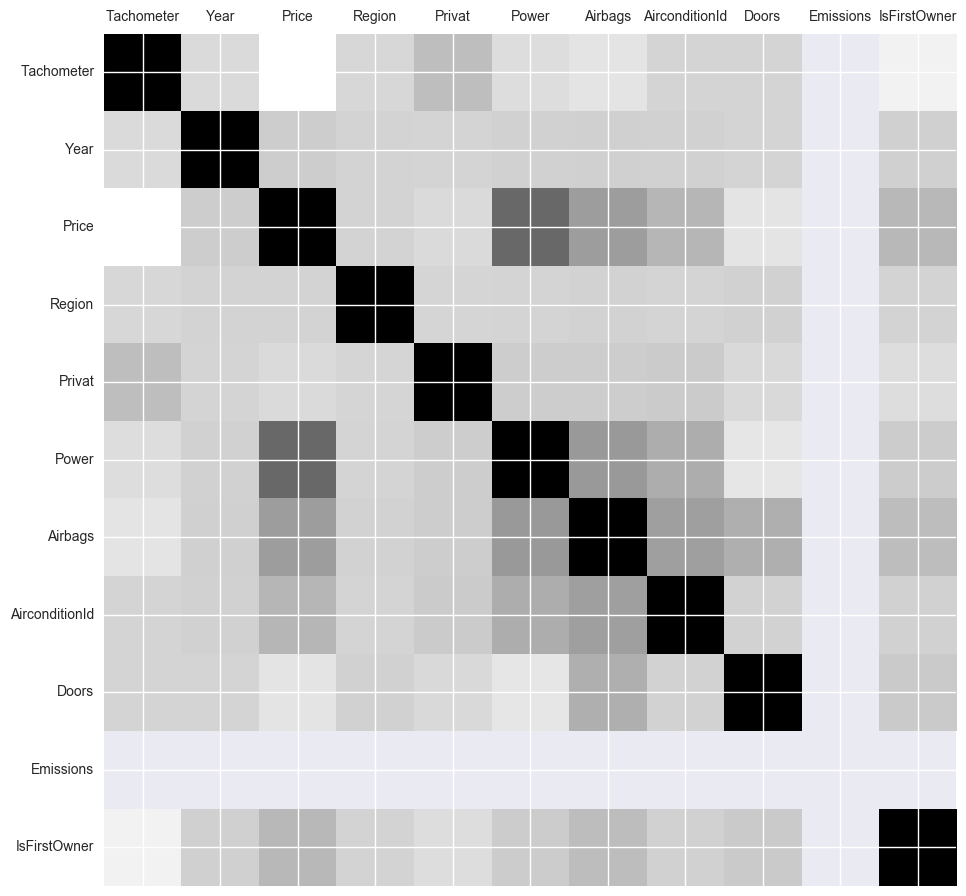

In [27]:
plot_corr(df_numeric.iloc[:,1:12],11)

## Compute correlations for first 11 columns:

In [25]:
df_numeric.iloc[:,1:12].corr()

,Tachometer,Year,Price,Region,Privat,Power,Airbags,AirconditionId,Doors,Emissions,IsFirstOwner
Tachometer,1.000000,-0.046430,-0.381926,-0.028284,0.126010,-0.074077,-0.122459,-0.007687,-0.004808,NaN,-0.231253
Year,-0.046430,1.000000,0.037661,0.000652,-0.008145,0.011821,0.016175,0.007012,-0.006143,NaN,0.014112
Price,-0.381926,0.037661,1.000000,-0.000572,-0.049931,0.539517,0.272769,0.166215,-0.118017,NaN,0.154690
Region,-0.028284,0.000652,-0.000572,1.000000,-0.011987,-0.007209,0.002061,-0.006086,0.007254,NaN,-0.002300
Privat,0.126010,-0.008145,-0.049931,-0.011987,1.000000,0.037082,0.034301,0.049661,-0.040037,NaN,-0.071453
Power,-0.074077,0.011821,0.539517,-0.007209,0.037082,1.000000,0.296995,0.201471,-0.136483,NaN,0.040010
Airbags,-0.122459,0.016175,0.272769,0.002061,0.034301,0.296995,1.000000,0.268633,0.199697,NaN,0.131254
AirconditionId,-0.007687,0.007012,0.166215,-0.006086,0.049661,0.201471,0.268633,1.000000,0.002082,NaN,0.006900
Doors,-0.004808,-0.006143,-0.118017,0.007254,-0.040037,-0.136483,0.199697,0.002082,1.000000,NaN,0.053666
Emissions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## The only correlation is between price & power

## Summary of numeric columns:

In [28]:
df.describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Id,CCM,Tachometer,Year,Price,Region,Privat,PriceOrig,Power,Airbags,...,IsAlloyWheels,IsParkingSensor,IsNavigation,IsRainSensor,IsPanoramicRoof,IsTrailerCoupling,IsCruiseControl,IsHeatedSeats,IsIsoFix,IsNeverDemaged
count,7.334400e+04,73248.000000,7.268200e+04,73338.000000,7.334400e+04,72333.000000,60276.000000,7.334400e+04,72901.00000,65430.000000,...,42865.0,27606.0,15111.0,23501.0,3211.0,12297.0,36490.0,25662.0,15143.0,1607.0
mean,7.607609e+07,1867.884925,1.275598e+05,2010.488587,3.173593e+05,51.987060,0.058863,3.176128e+05,97.29134,5.523705,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,2.117273e+04,678.670044,9.635746e+04,110.495126,4.534490e+05,64.133519,0.235369,4.534039e+05,62.12050,2.623404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,7.603942e+07,10.000000,0.000000e+00,1998.000000,1.000000e+03,0.000000,0.000000,1.000000e+03,4.00000,1.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,7.605776e+07,NaN,NaN,NaN,9.800000e+04,NaN,NaN,9.800000e+04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.607609e+07,NaN,NaN,NaN,1.980000e+05,NaN,NaN,1.980000e+05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.609443e+07,NaN,NaN,NaN,3.699990e+05,NaN,NaN,3.700000e+05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,7.611276e+07,9999.000000,3.960000e+06,9999.000000,3.600000e+07,2691.000000,1.000000,3.600000e+07,5010.00000,14.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## NULL VALUES

In [29]:
sum([True for idx,row in df.iterrows() if any(row.isnull())])

73344

## Null values penetration by column:

In [33]:
df.isnull().sum(axis=0)*100/len(df)

Id                     0.000000
DateIn                 0.000000
Http                   0.000000
Make                   0.040903
Model                  0.361311
Body                   0.000000
Fuel                   0.001363
CCM                    0.130890
Tachometer             0.902596
Automat                2.714605
Year                   0.008181
Price                  0.000000
Region                 1.378436
Privat                17.817408
Drive                 85.518925
CountryCode            0.000000
Currency               0.000000
PostalCode             1.071662
City                   0.902596
PriceOrig              0.000000
CurrencyOrig           0.000000
Power                  0.604003
Airbags               10.790249
AirconditionId        11.214278
Doors                  6.736747
Emissions            100.000000
IsFirstOwner           0.779887
IsServiceBook          0.000000
Seats                  7.576625
STK                   23.358421
Title                  0.000000
PrivateS

In [57]:
mask_null_over_10_percent= df.isnull().sum(axis=0)*100/len(df)<10

In [58]:
mask_null_over_10_percent

Id                    True
DateIn                True
Http                  True
Make                  True
Model                 True
Body                  True
Fuel                  True
CCM                   True
Tachometer            True
Automat               True
Year                  True
Price                 True
Region                True
Privat               False
Drive                False
CountryCode           True
Currency              True
PostalCode            True
City                  True
PriceOrig             True
CurrencyOrig          True
Power                 True
Airbags              False
AirconditionId       False
Doors                 True
Emissions            False
IsFirstOwner          True
IsServiceBook         True
Seats                 True
STK                  False
Title                 True
PrivateSynth          True
Category              True
SellerNameID          True
DateInWeb             True
Euro                 False
Consumption          False
I

In [49]:
len(mask_null_over_10_percent)

56

In [53]:
df.shape

(73344, 56)

In [59]:
df_clean=df[mask_null_over_10_percent.index[mask_null_over_10_percent]]

In [60]:
df_clean.shape

(73344, 29)

In [61]:
df_clean[:5]

,Id,DateIn,Http,Make,Model,Body,Fuel,CCM,Tachometer,Automat,...,Power,Doors,IsFirstOwner,IsServiceBook,Seats,Title,PrivateSynth,Category,SellerNameID,DateInWeb
0,76112740,02-10-2016,http://www.sauto.cz/osobni/detail/peugeot/307/...,Peugeot,307,Combi,Petrol,1587.0,329148.0,Manual,...,80.0,5.0,0.0,0,5.0,"Peugeot 307 SW 1,6",107,1,1021.0,02-10-2016
1,76102112,01-10-2016,http://www.sauto.cz/osobni/detail/renault/mega...,Renault,Megane,Hatchback,Petrol,1598.0,175000.0,Manual,...,79.0,5.0,0.0,0,5.0,"Renault M?gane 1,6 16V",1,1,NaN,01-10-2016
2,76102055,01-10-2016,http://www.sauto.cz/osobni/detail/skoda/felici...,Skoda,Felicia,Hatchback,Petrol,1300.0,94982.0,Manual,...,50.0,5.0,0.0,0,5.0,"?koda Felicia 1.3, ?R,2.maj, Eko.zaplacen",107,1,240.0,01-10-2016
3,76107602,01-10-2016,http://www.sauto.cz/osobni/detail/citroen/saxo...,Citroen,Saxo,Hatchback,Petrol,1124.0,16900.0,Manual,...,44.0,NaN,0.0,0,NaN,"Citro?n Saxo 1.1 (44 kW), nov STK",0,1,NaN,01-10-2016
4,76112710,01-10-2016,http://www.sauto.cz/osobni/detail/volkswagen/p...,VW,Passat,Sedan/Saloon,LPG,1781.0,264000.0,Manual,...,110.0,4.0,0.0,0,5.0,Volkswagen Passat 1.8T,1,1,NaN,01-10-2016


In [62]:
df_clean.columns.values.tolist()

['Id',
 'DateIn',
 'Http',
 'Make',
 'Model',
 'Body',
 'Fuel',
 'CCM',
 'Tachometer',
 'Automat',
 'Year',
 'Price',
 'Region',
 'CountryCode',
 'Currency',
 'PostalCode',
 'City',
 'PriceOrig',
 'CurrencyOrig',
 'Power',
 'Doors',
 'IsFirstOwner',
 'IsServiceBook',
 'Seats',
 'Title',
 'PrivateSynth',
 'Category',
 'SellerNameID',
 'DateInWeb']

In [63]:
df_clean.isnull().sum(axis=0)*100/len(df_clean)

Id               0.000000
DateIn           0.000000
Http             0.000000
Make             0.040903
Model            0.361311
Body             0.000000
Fuel             0.001363
CCM              0.130890
Tachometer       0.902596
Automat          2.714605
Year             0.008181
Price            0.000000
Region           1.378436
CountryCode      0.000000
Currency         0.000000
PostalCode       1.071662
City             0.902596
PriceOrig        0.000000
CurrencyOrig     0.000000
Power            0.604003
Doors            6.736747
IsFirstOwner     0.779887
IsServiceBook    0.000000
Seats            7.576625
Title            0.000000
PrivateSynth     0.000000
Category         0.000000
SellerNameID     8.355148
DateInWeb        1.627945
dtype: float64

## Impute missing values

## Impute for numeric columns with mean

In [66]:
df_imputed=df_clean.fillna(df_clean.mean())

In [67]:
df_imputed.isnull().sum(axis=0)*100/len(df_imputed)

Id               0.000000
DateIn           0.000000
Http             0.000000
Make             0.040903
Model            0.361311
Body             0.000000
Fuel             0.001363
CCM              0.000000
Tachometer       0.000000
Automat          2.714605
Year             0.000000
Price            0.000000
Region           0.000000
CountryCode      0.000000
Currency         0.000000
PostalCode       1.071662
City             0.902596
PriceOrig        0.000000
CurrencyOrig     0.000000
Power            0.000000
Doors            0.000000
IsFirstOwner     0.000000
IsServiceBook    0.000000
Seats            0.000000
Title            0.000000
PrivateSynth     0.000000
Category         0.000000
SellerNameID     0.000000
DateInWeb        1.627945
dtype: float64

In [70]:
df_imputed = df_imputed.apply(lambda x:x.fillna(x.value_counts().index[0]))

## Impute for categotical columns:

In [71]:
df_imputed.isnull().sum(axis=0)*100/len(df_imputed)

Id               0.0
DateIn           0.0
Http             0.0
Make             0.0
Model            0.0
Body             0.0
Fuel             0.0
CCM              0.0
Tachometer       0.0
Automat          0.0
Year             0.0
Price            0.0
Region           0.0
CountryCode      0.0
Currency         0.0
PostalCode       0.0
City             0.0
PriceOrig        0.0
CurrencyOrig     0.0
Power            0.0
Doors            0.0
IsFirstOwner     0.0
IsServiceBook    0.0
Seats            0.0
Title            0.0
PrivateSynth     0.0
Category         0.0
SellerNameID     0.0
DateInWeb        0.0
dtype: float64

## Is there a relation between KM and Price?

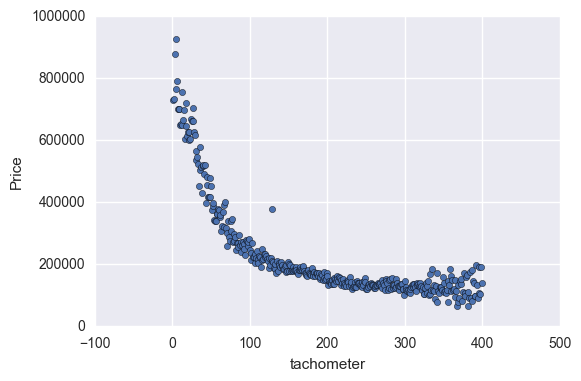

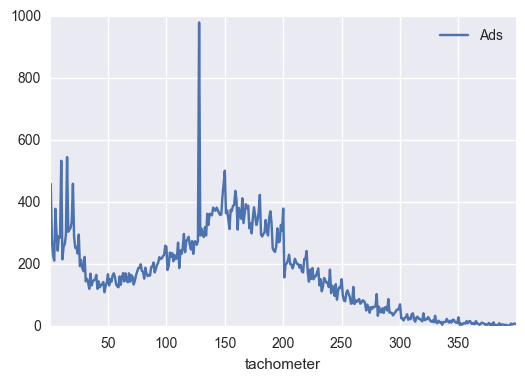

In [72]:
pysqldf = lambda q: sqldf(q, globals())

q  = """
SELECT
  round(tachometer/1000,0) as tachometer, avg(PriceOrig) as Price, count(Id) as Ads
FROM
  df_imputed
where 
round(tachometer/1000,0)<400
and round(tachometer/1000,0)>0
GROUP BY
round(tachometer/1000,0)
--having
 ;
"""

df2 = pysqldf(q)
df2.plot.scatter(x='tachometer', y='Price')
df2.plot(x='tachometer', y='Ads')

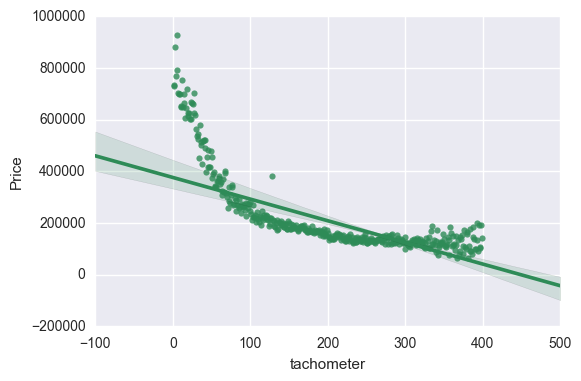

In [73]:
sns.regplot("tachometer", "Price", data=df2, robust=True, ci=95, color="seagreen")
sns.despine()